# Lab | Feature engineering

- In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

### Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

-Check for null values in the numerical columns.

-Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

-Use appropriate EDA technique where ever necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('learningSet.csv')
df.head()

/var/folders/tj/g9zg8y1s2ns5lbq88szqwp_w0000gn/T/ipykernel_41325/3328894399.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


### Check for null values in the numerical columns:

In [3]:
numerical = df.select_dtypes(np.number)

In [4]:
nulls_percent = (pd.DataFrame(numerical.isna().sum()/len(numerical))).reset_index()

nulls_percent.columns = ['column_name', 'nulls_percentage']

nulls = nulls_percent[nulls_percent['nulls_percentage']!=0]

nulls

,column_name,nulls_percentage
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


### Use appropriate methods to clean the columns GEOCODE2:

In [5]:
df[['GEOCODE2']].value_counts(dropna=False)

GEOCODE2
A           34484
B           28505
D           16580
C           15524
              187
NaN           132
dtype: int64

<AxesSubplot:xlabel='GEOCODE2', ylabel='Count'>

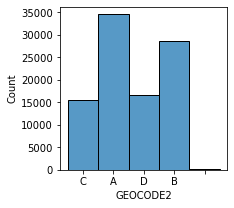

In [6]:
fig, ax = plt.subplots(figsize=(3,3))
sns.histplot(df['GEOCODE2'])

#### Replacing the white spaces with NaN values:

In [7]:
df['GEOCODE2'] = df['GEOCODE2'].replace({' ': np.NaN})

In [8]:
df[['GEOCODE2']].value_counts(dropna=False)

GEOCODE2
A           34484
B           28505
D           16580
C           15524
NaN           319
dtype: int64

#### Replacing the NaN values with the mode:

In [9]:
mode = df['GEOCODE2'].mode()[0]

mode

'A'

In [10]:
df['GEOCODE2'] = df['GEOCODE2'].fillna(mode)

In [11]:
df['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

<AxesSubplot:xlabel='GEOCODE2', ylabel='Count'>

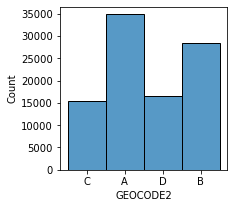

In [12]:
fig, ax = plt.subplots(figsize=(3,3))
sns.histplot(df['GEOCODE2'])

### Use appropriate methods to clean the columns WEALTH1:

In [13]:
df['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

Turning into object because it's a category displayed as a numbers:

In [25]:
df['WEALTH1'] = df['WEALTH1'].astype('object')

<AxesSubplot:xlabel='WEALTH1', ylabel='Count'>

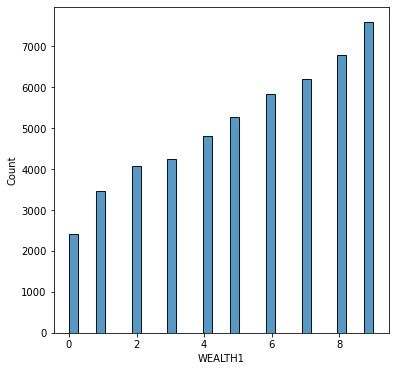

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['WEALTH1'])

#### Replacing NaN values with the median:

In [22]:
df['WEALTH1'].isna().sum()

44732

In [23]:
median_wealth = df['WEALTH1'].median()

df['WEALTH1'] = df['WEALTH1'].fillna(median_wealth)

In [24]:
df['WEALTH1'].isna().sum()

0

### Use appropriate methods to clean the columns ADI:

In [26]:
df['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

<AxesSubplot:xlabel='ADI', ylabel='Count'>

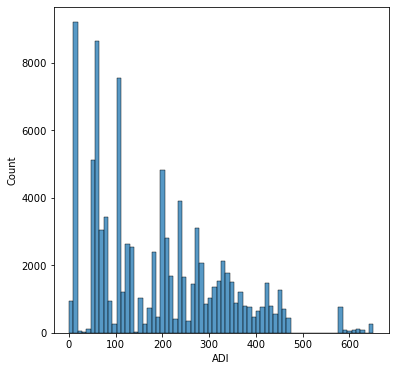

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['ADI'])

#### Replacing NA values with the mean:

In [28]:
df['ADI'].isna().sum()

132

In [29]:
adi_mean = np.mean(df['ADI'])
print(adi_mean)

187.35640218303945


In [30]:
df['ADI'] = df['ADI'].fillna(adi_mean)

In [31]:
df['ADI'].isna().sum()

0

<AxesSubplot:xlabel='ADI', ylabel='Count'>

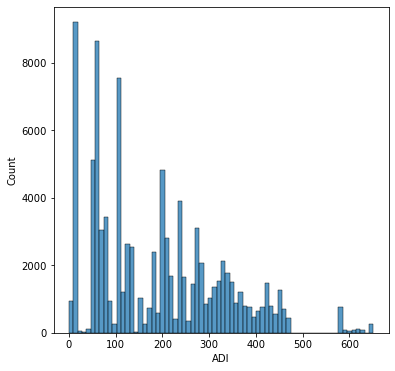

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['ADI'])

### Use appropriate methods to clean the columns DMA:

In [34]:
df['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

<AxesSubplot:xlabel='DMA', ylabel='Count'>

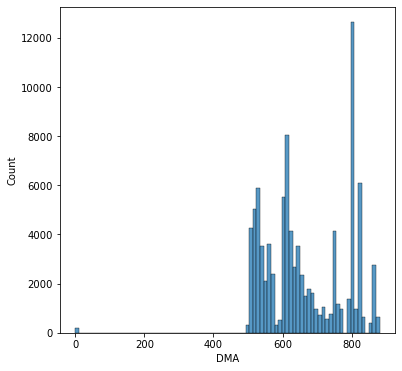

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['DMA'])

#### Replacing NA values with the mean:

In [33]:
df['DMA'].isna().sum()

132

In [36]:
dma_mean = np.mean(df['DMA'])
print(dma_mean)

664.0040722082284


In [37]:
df['DMA'] = df['DMA'].fillna(dma_mean)

In [38]:
df['DMA'].isna().sum()

0

<AxesSubplot:xlabel='DMA', ylabel='Count'>

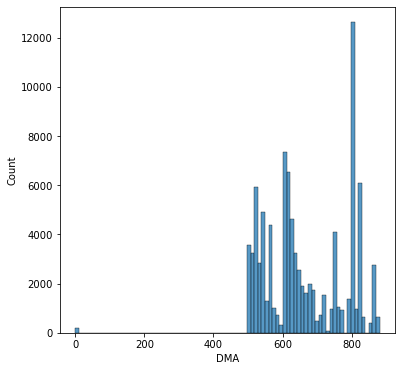

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['DMA'])

### Use appropriate methods to clean the columns MSA:

In [41]:
df['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

<AxesSubplot:xlabel='MSA', ylabel='Count'>

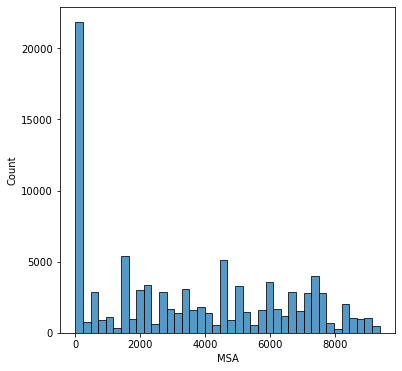

In [42]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['MSA'])

#### Replacing NA values with the median:

In [40]:
df['MSA'].isna().sum()

132

In [43]:
msa_median = df['MSA'].median()
print(msa_median)

3350.0


In [44]:
df['MSA'] = df['MSA'].fillna(msa_median)

In [45]:
df['MSA'].isna().sum()

0

<AxesSubplot:xlabel='MSA', ylabel='Count'>

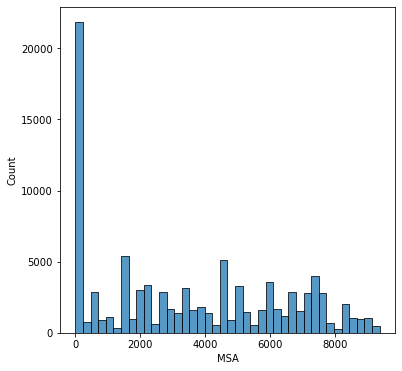

In [46]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df['MSA'])